<a href="https://colab.research.google.com/github/cuboidandroid/neunet_training_on_tensor/blob/main/Neunet_vs_TensorFlow_on_Iris_finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import sys
sys.path.append('gdrive/MyDrive/neunet')

In [ ]:
from neunet import NeuralNetwork

In [ ]:
my_net = NeuralNetwork([4,10,10,3], ['relu', 'relu', 'relu'])
print(my_net.weights)
print(my_net.betas)

[nan, array([[-0.60422581, -0.75968746,  0.86861246,  0.96874218],
       [ 0.88048845,  0.52457485,  0.93420187, -0.8405499 ],
       [-0.80005611, -0.95295353,  0.61736403, -0.50190149],
       [-0.38998053, -0.50058671,  0.84160678,  0.72869273],
       [ 0.27003402, -0.20764174,  0.93561201, -0.80923653],
       [ 0.1414986 , -0.07694714,  0.10166778, -0.02322295],
       [-0.74762364, -0.1266959 , -0.43930903,  0.06218266],
       [-0.62998592, -0.71948436, -0.36930598,  0.09488243],
       [-0.83136286, -0.37314471,  0.03392773,  0.99348651],
       [-0.79954384,  0.46999409, -0.46209379,  0.90578785]]), array([[ 0.96709437, -0.57029695,  0.3249792 , -0.00622804,  0.01619027,
        -0.17974419,  0.95179353, -0.76706887,  0.72246014, -0.53970922],
       [ 0.64787136,  0.62076121,  0.25365513, -0.28522694, -0.04250332,
        -0.70665312,  0.46092167,  0.91885179, -0.34680018,  0.45049566],
       [-0.61452206, -0.02048898, -0.0174658 ,  0.3308647 ,  0.203915  ,
        -0.7185

In [3]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('iris')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
df = pd.concat([df, pd.get_dummies(df['species'])], axis=1)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0


In [ ]:
X = df.iloc[:, 0:4]
y = df.loc[:, ['setosa', 'versicolor', 'virginica']]
print('features= ', list(X.columns), '\nlabels= ', list(y.columns))

features=  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
labels=  ['setosa', 'versicolor', 'virginica']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Let the learning begin (SGD)

iteration 0 error before [37.52108632] error after [18.3315814]
iteration 5000 error before [0.06304379] error after [0.05405302]
iteration 10000 error before [0.40012009] error after [0.26887435]
iteration 15000 error before [0.69585762] error after [0.38438679]
iteration 20000 error before [0.02026721] error after [0.01724823]
iteration 25000 error before [0.00403627] error after [0.00373192]
iteration 30000 error before [0.02138151] error after [0.01975976]
iteration 35000 error before [0.00381383] error after [0.00328808]
iteration 40000 error before [0.01480273] error after [0.01266132]
iteration 45000 error before [0.00179877] error after [0.00125122]
iteration 50000 error before [0.00069118] error after [0.00059931]
iteration 55000 error before [0.12440826] error after [0.08552798]
iteration 60000 error before [0.00076659] error after [0.00057816]
iteration 65000 error before [0.50429842] error after [0.35979871]
iteration 70000 error before [0.00276983] error after [0.00256156]

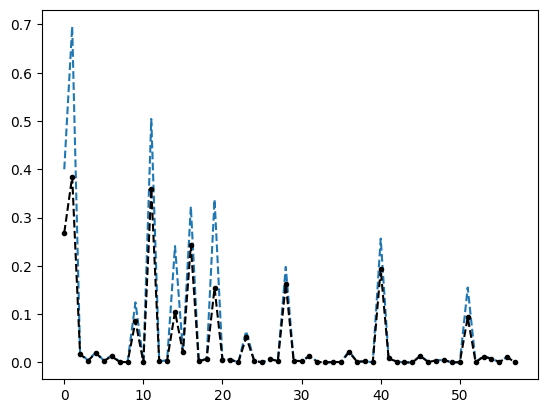

In [ ]:
my_net = NeuralNetwork([4,10,10,3], ['relu', 'relu', 'relu'])
learning_rate = 0.001
error_before = []
error_after = []
for u in range(300_000):
  i = np.random.choice(X_train.index)

  example = X_train.loc[i, :]
  label = y_train.loc[i, :]

  x = example.astype(float).to_numpy().reshape((4,1))
  y = label.astype(float).to_numpy().reshape((3,1))

  y_hat = my_net.forward_pass(x)
  deltas = my_net.backward_pass(y_hat, y)

  my_net.update_weights(y_hat, deltas, learning_rate)
  my_net.update_biases(deltas, learning_rate)

  y_hat2 = my_net.forward_pass(x)

  error_before.append(sum((y_hat[-1] - y)**2))
  error_after.append(sum((y_hat2[-1] - y)**2))

  if u % 5000 == 0:
      print(f'iteration {u} error before {sum((y_hat[-1] - y)**2)} error after {sum((y_hat2[-1] - y)**2)}')

plt.plot(error_before[10000::5000], '--')
plt.plot(error_after[10000::5000], 'k.--')

# Score on train data

In [ ]:
normalized_labels = []
normalized_predictions = []

for i in X_train.index:
    example = X_train.loc[i, :]
    label = y_train.loc[i, :]
    x = example.astype(float).to_numpy().reshape((4,1))
    y = label.astype(float).to_numpy().reshape((3,1))
    y_hat = my_net.forward_pass(x)
    normalized_label = [bool(x) for x in label.to_list()]
    normalized_prediction = list((y_hat[-1]==max(y_hat[-1])).ravel())
    normalized_labels.append(normalized_label)
    normalized_predictions.append(normalized_prediction)

acc = accuracy_score(normalized_labels, normalized_predictions)
print(acc)

0.9916666666666667


# Score on test data

In [ ]:

normalized_labels = []
normalized_predictions = []

for i in X_test.index:
    example = X_test.loc[i, :]
    label = y_test.loc[i, :]
    x = example.astype(float).to_numpy().reshape((4,1))
    y = label.astype(float).to_numpy().reshape((3,1))
    y_hat = my_net.forward_pass(x)
    normalized_label = [bool(x) for x in label.to_list()]
    normalized_prediction = list((y_hat[-1]==max(y_hat[-1])).ravel())
    normalized_labels.append(normalized_label)
    normalized_predictions.append(normalized_prediction)

acc = accuracy_score(normalized_labels, normalized_predictions)
print(acc)

1.0


# Save and reuse

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/iris_estim.pkl', 'wb') as f:
    pickle.dump(my_net, f)

In [ ]:
with open('/content/gdrive/MyDrive/iris_estim.pkl', 'rb') as f:
    loaded_net = pickle.load(f)

print(loaded_net.weights)
print(loaded_net.betas)

[nan, array([[-0.48319987,  0.41591316, -0.07044323, -0.99685355],
       [-0.81087614, -0.57860047,  0.39396169, -0.90117737],
       [ 0.5638826 ,  0.8467719 , -0.05081161, -1.14810223],
       [-0.01039802, -0.15342518, -0.25208379,  0.84778692],
       [ 0.47420532, -0.62978649,  0.01484925, -0.9194056 ],
       [ 0.111348  , -0.48387328, -0.92028365,  0.94257403],
       [-0.80897088,  0.37587684,  0.35667661,  0.46884875],
       [ 0.05538118,  0.17503216, -0.92473204, -0.31564399],
       [ 0.4554186 , -0.22342288, -0.67715246, -0.78358952],
       [-0.04981807, -0.65897665,  1.15895974,  0.37481805]]), array([[ 0.17378608,  0.70474587,  0.7561494 , -0.22512714, -0.17892268,
         0.50401166, -0.29047226, -0.88847109, -0.17880598, -0.89783169],
       [ 0.80253799,  0.12033352,  0.31854551, -0.33801822,  0.20865268,
         0.90668734,  0.87451028,  0.28510901, -0.62295971, -0.94479099],
       [ 0.39748642, -0.60192985, -0.35253469, -0.71456511, -0.6166439 ,
         0.6214

In [ ]:
example_setosa = np.array([[5.1,	3.5,	1.4,	0.2]]).reshape((4,1))
loaded_net.forward_pass(example_setosa)

[array([[5.1],
        [3.5],
        [1.4],
        [0.2]]),
 array([[0.        ],
        [0.        ],
        [5.46299517],
        [0.        ],
        [0.56974467],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]),
 array([[4.4791396 ],
        [2.45247986],
        [0.        ],
        [1.91505871],
        [0.68212326],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]),
 array([[1.01772757],
        [0.        ],
        [0.        ]])]

# Tensorflow Portion

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [7]:
df = sns.load_dataset('iris')
# Omiting standard scaling for now

In [8]:
# lets use this and categorical encoder from keras instead of pd.get_dummies() as previously
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['speciesEncoded'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,speciesEncoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [30]:
print(le.classes_)

['setosa' 'versicolor' 'virginica']


In [9]:
X = df.drop(columns=['species', 'speciesEncoded'])
y = df['speciesEncoded']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
for x in [X_train, X_test, y_train, y_test]:
  print(x.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [13]:
# again instead of pd.get_dummies() approach
y_train = keras.utils.to_categorical(y_train)
print(y_train[:5])

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [14]:
# from tf.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [41]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(X_train.shape[-1], )))
model.add(Dense(units=10, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.fit(X_train, y_train, epochs=120, verbose=2)

Epoch 1/120
4/4 - 1s - loss: 1.8759 - accuracy: 0.3667 - 715ms/epoch - 179ms/step
Epoch 2/120
4/4 - 0s - loss: 1.7148 - accuracy: 0.3667 - 12ms/epoch - 3ms/step
Epoch 3/120
4/4 - 0s - loss: 1.5752 - accuracy: 0.3667 - 11ms/epoch - 3ms/step
Epoch 4/120
4/4 - 0s - loss: 1.4459 - accuracy: 0.3667 - 11ms/epoch - 3ms/step
Epoch 5/120
4/4 - 0s - loss: 1.3287 - accuracy: 0.3667 - 12ms/epoch - 3ms/step
Epoch 6/120
4/4 - 0s - loss: 1.2242 - accuracy: 0.3667 - 14ms/epoch - 3ms/step
Epoch 7/120
4/4 - 0s - loss: 1.1368 - accuracy: 0.3667 - 13ms/epoch - 3ms/step
Epoch 8/120
4/4 - 0s - loss: 1.0675 - accuracy: 0.3667 - 14ms/epoch - 3ms/step
Epoch 9/120
4/4 - 0s - loss: 1.0107 - accuracy: 0.3667 - 13ms/epoch - 3ms/step
Epoch 10/120
4/4 - 0s - loss: 0.9622 - accuracy: 0.3667 - 12ms/epoch - 3ms/step
Epoch 11/120
4/4 - 0s - loss: 0.9220 - accuracy: 0.3667 - 11ms/epoch - 3ms/step
Epoch 12/120
4/4 - 0s - loss: 0.8827 - accuracy: 0.3917 - 12ms/epoch - 3ms/step
Epoch 13/120
4/4 - 0s - loss: 0.8516 - accurac

In [44]:
prediction = model.predict(X_test)
for x, y in zip(prediction[:10], y_test[:10]):
  print(f"output={x}, prediction={np.argmax(x)}, true={y}")

1/1 [==============================] - 0s 57ms/step
output=[0.00144643 0.19079767 0.8077559 ], prediction=2, true=2
output=[0.01532618 0.56832916 0.41634464], prediction=1, true=1
output=[9.9238098e-01 2.1227257e-04 7.4067344e-03], prediction=0, true=0
output=[0.00091865 0.19275728 0.80632406], prediction=2, true=2
output=[0.9783025  0.00140232 0.0202952 ], prediction=0, true=0
output=[6.5335433e-04 1.5987957e-01 8.3946705e-01], prediction=2, true=2
output=[9.8295820e-01 9.0624281e-04 1.6135624e-02], prediction=0, true=0
output=[0.00688215 0.57668036 0.4164375 ], prediction=1, true=1
output=[0.00630442 0.5058194  0.48787615], prediction=1, true=1
output=[0.013297  0.6541985 0.3325045], prediction=1, true=1


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [45]:
prediction = np.argmax(prediction, axis=-1)
print(accuracy_score(y_test, prediction))

1.0


In [46]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


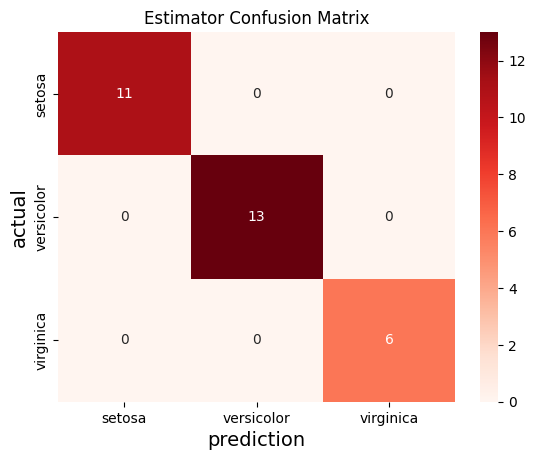

In [47]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                 xticklabels=le.classes_, yticklabels=le.classes_)
ax.set_title('Estimator Confusion Matrix')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)
plt.show()